In [1]:
# Add relevant Jupyter notebook extensions 
%load_ext autoreload
%autoreload 2

In [2]:
# You can double-check your Python path like this...

import sys, os
sys.path.insert(0, os.path.abspath(".."))  # 用 insert(0) 抢到最前面


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

<class 'uuv_mission.dynamic.Mission'> [30.         29.1612757  27.95432371 31.84808307 29.37818486 25.27534783
 24.38569495 17.12130565 21.42218238 14.07770057  9.31167906 17.30453761
 18.04258429 13.80638728 13.65092548 21.34658721 18.26466944 23.65180987
 30.64954658 31.32623147 26.78523018 31.0937281  25.18753312 18.40172099
 20.05963077 23.99504025 22.2065633  22.88050411 26.21701772 19.24467403
 19.37212799 26.92528802 24.83739531 29.03085921 34.84534492 29.54832571
 31.54005596 37.25419248 28.75835967 30.56073552 25.68183874 25.91060678
 25.95640903 22.75561528 24.73883269 19.95637585 27.84941028 31.02058763
 26.55477731 26.61281945 27.53430366 26.76298091 29.38225215 30.63927406
 33.10956822 33.01663938 26.16474986 23.78722065 24.39922357 18.60402312
 15.79334558 13.83053667 12.74624188 17.30387203 23.25480998 20.96471202
 22.38694481 25.10587873 24.84982899 26.9842448  21.07375237 25.18518059
 24.74688217 22.8845309  24.5795913  18.68969175 20.55684315 20.70466556
 14.27287334 

[autoreload of uuv_mission.controller failed: Traceback (most recent call last):
  File "d:\Repository\B1_Computing\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 322, in check
    elif self.deduper_reloader.maybe_reload_module(m):
         ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "d:\Repository\B1_Computing\venv\Lib\site-packages\IPython\extensions\deduperreload\deduperreload.py", line 545, in maybe_reload_module
    new_source_code = f.read()
UnicodeDecodeError: 'gbk' codec can't decode byte 0x80 in position 67: illegal multibyte sequence
]


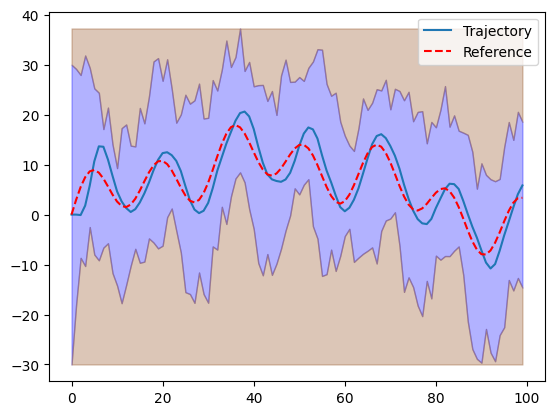

In [ ]:
# Import relevant modules


from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.controller import PIDController
import numpy as np
sub = Submarine()




# Instantiate your controller (depending on your implementation)
controller = PIDController(kp=0.13, kd=0.55,kI =0.3)  # Example parameters
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("../data/mission.csv") # You must implement this method in the Mission class

print(type(mission), getattr(mission, "cave_height", None))
trajectory = closed_loop.simulate_with_random_disturbances(mission,variance=0.3)
trajectory.plot_completed_mission(mission)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from uuv_mission.dynamic import ClosedLoop, Mission

# 获取参考信号和输出信号
r = np.array(mission.reference)     # 参考轨迹（目标深度）
y = np.array(action[t])      # 实际轨迹（潜艇输出）

# 计算误差
e = r - y

# 计算指标
mse = np.mean(e**2)
mae = np.mean(np.abs(e))
max_error = np.max(np.abs(e))

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Maximum Error: {max_error:.4f}")

# 绘制误差随时间变化曲线
plt.figure(figsize=(8,4))
plt.plot(e, label='Error e[t]', color='red')
plt.xlabel('Time step')
plt.ylabel('Error (r - y)')
plt.title('Tracking Error over Time')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'action' is not defined